In [17]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

In [3]:
df_train = pd.read_csv('../datasets/tabular/train.csv')
df_test = pd.read_csv('../datasets/tabular/test.csv')

In [7]:
df_train

id cat0 cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8  ...     cont2  \
0            0    A    I    A    B    B   BI    A    S    Q  ...  0.759439   
1            1    A    I    A    A    E   BI    K    W   AD  ...  0.386385   
2            2    A    K    A    A    E   BI    A    E   BM  ...  0.343255   
3            3    A    K    A    C    E   BI    A    Y   AD  ...  0.831147   
4            4    A    I    G    B    E   BI    C    G    Q  ...  0.338818   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
299995  499993    A    N    F    A    E   BU    A   AS    K  ...  0.662428   
299996  499995    A    K    A    A    G   BI    A    K   AE  ...  0.821657   
299997  499996    A    G    M    A    H   BI    C    L    F  ...  0.407037   
299998  499997    B    H    A    D    B   BI    A   AA   AX  ...  0.808045   
299999  499999    A    F    C    A    E   BI    C   AV    S  ...  0.775451   

           cont3     cont4     cont5     cont6     cont7     cont8     cont9  \
0       0.795549  0.681917  0.621672  0.592184  0.791921  0.815254  0.965006   
1       0.541366  0.388982  0.357778  0.600044  0.408701  0.399353  0.927406   
2       0.616352  0.793687  0.552877  0.352113  0.388835  0.412303  0.292696   
3       0.807807  0.800032  0.619147  0.221789  0.897617  0.633669  0.760318   
4       0.277308  0.610578  0.128291  0.578764  0.279167  0.351103  0.357084   
...          ...       ...       ...       ...       ...       ...       ...   
299995  0.671927  0.390566  0.145840  0.262767  0.514248  0.519340  0.617436   
299996  0.620356  0.384891  0.735879  0.547731  0.726653  0.470575  0.275743   
299997  0.232436  0.832482  0.810663  0.596939  0.308821  0.373997  0.518024   
299998  0.630708  0.346898  0.735147  0.563488  0.609836  0.680430  0.318453   
299999  0.848696  0.819377  0.355467  0.218153  0.968856  0.823655  0.330515   

          cont10 target  
0       0.665915      0  
1       0.493729      0  
2       0.549452      0  
3       0.934242      0  
4       0.328960      1  
...          ...    ...  
299995  0.688007      0  
299996  0.638939      0  
299997  0.452144      1  
299998  0.335822      0  
299999  0.972569      0  

[300000 rows x 32 columns]

In [5]:
df_train.describe()

id          cont0          cont1          cont2  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean   250183.425697       0.504749       0.494073       0.516632   
std    144320.334812       0.206788       0.213037       0.214851   
min         0.000000      -0.049562       0.084480       0.094493   
25%    125399.750000       0.344985       0.317363       0.326047   
50%    250192.500000       0.479650       0.463170       0.471247   
75%    375246.250000       0.637657       0.693992       0.704625   
max    499999.000000       1.004559       1.009958       1.016600   

               cont3          cont4          cont5          cont6  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.474235       0.504848       0.502257       0.488229   
std         0.216636       0.227474       0.241243       0.211335   
min        -0.045316       0.168071      -0.036379       0.005199   
25%         0.292249       0.279303       0.276442       0.323914   
50%         0.387564       0.479858       0.554768       0.518089   
75%         0.644950       0.725779       0.735225       0.608537   
max         0.952187       0.858578       0.853022       0.966553   

               cont7          cont8          cont9         cont10  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.501739       0.488074       0.469496       0.508230   
std         0.203496       0.179048       0.194516       0.203393   
min         0.090901       0.024139       0.214866       0.097789   
25%         0.353054       0.358915       0.309934       0.368312   
50%         0.435404       0.410908       0.407477       0.446576   
75%         0.642023       0.612725       0.586793       0.581957   
max         1.035818       1.055885       1.005652       1.011331   

              target  
count  300000.000000  
mean        0.264870  
std         0.441265  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [6]:
#no missing value
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

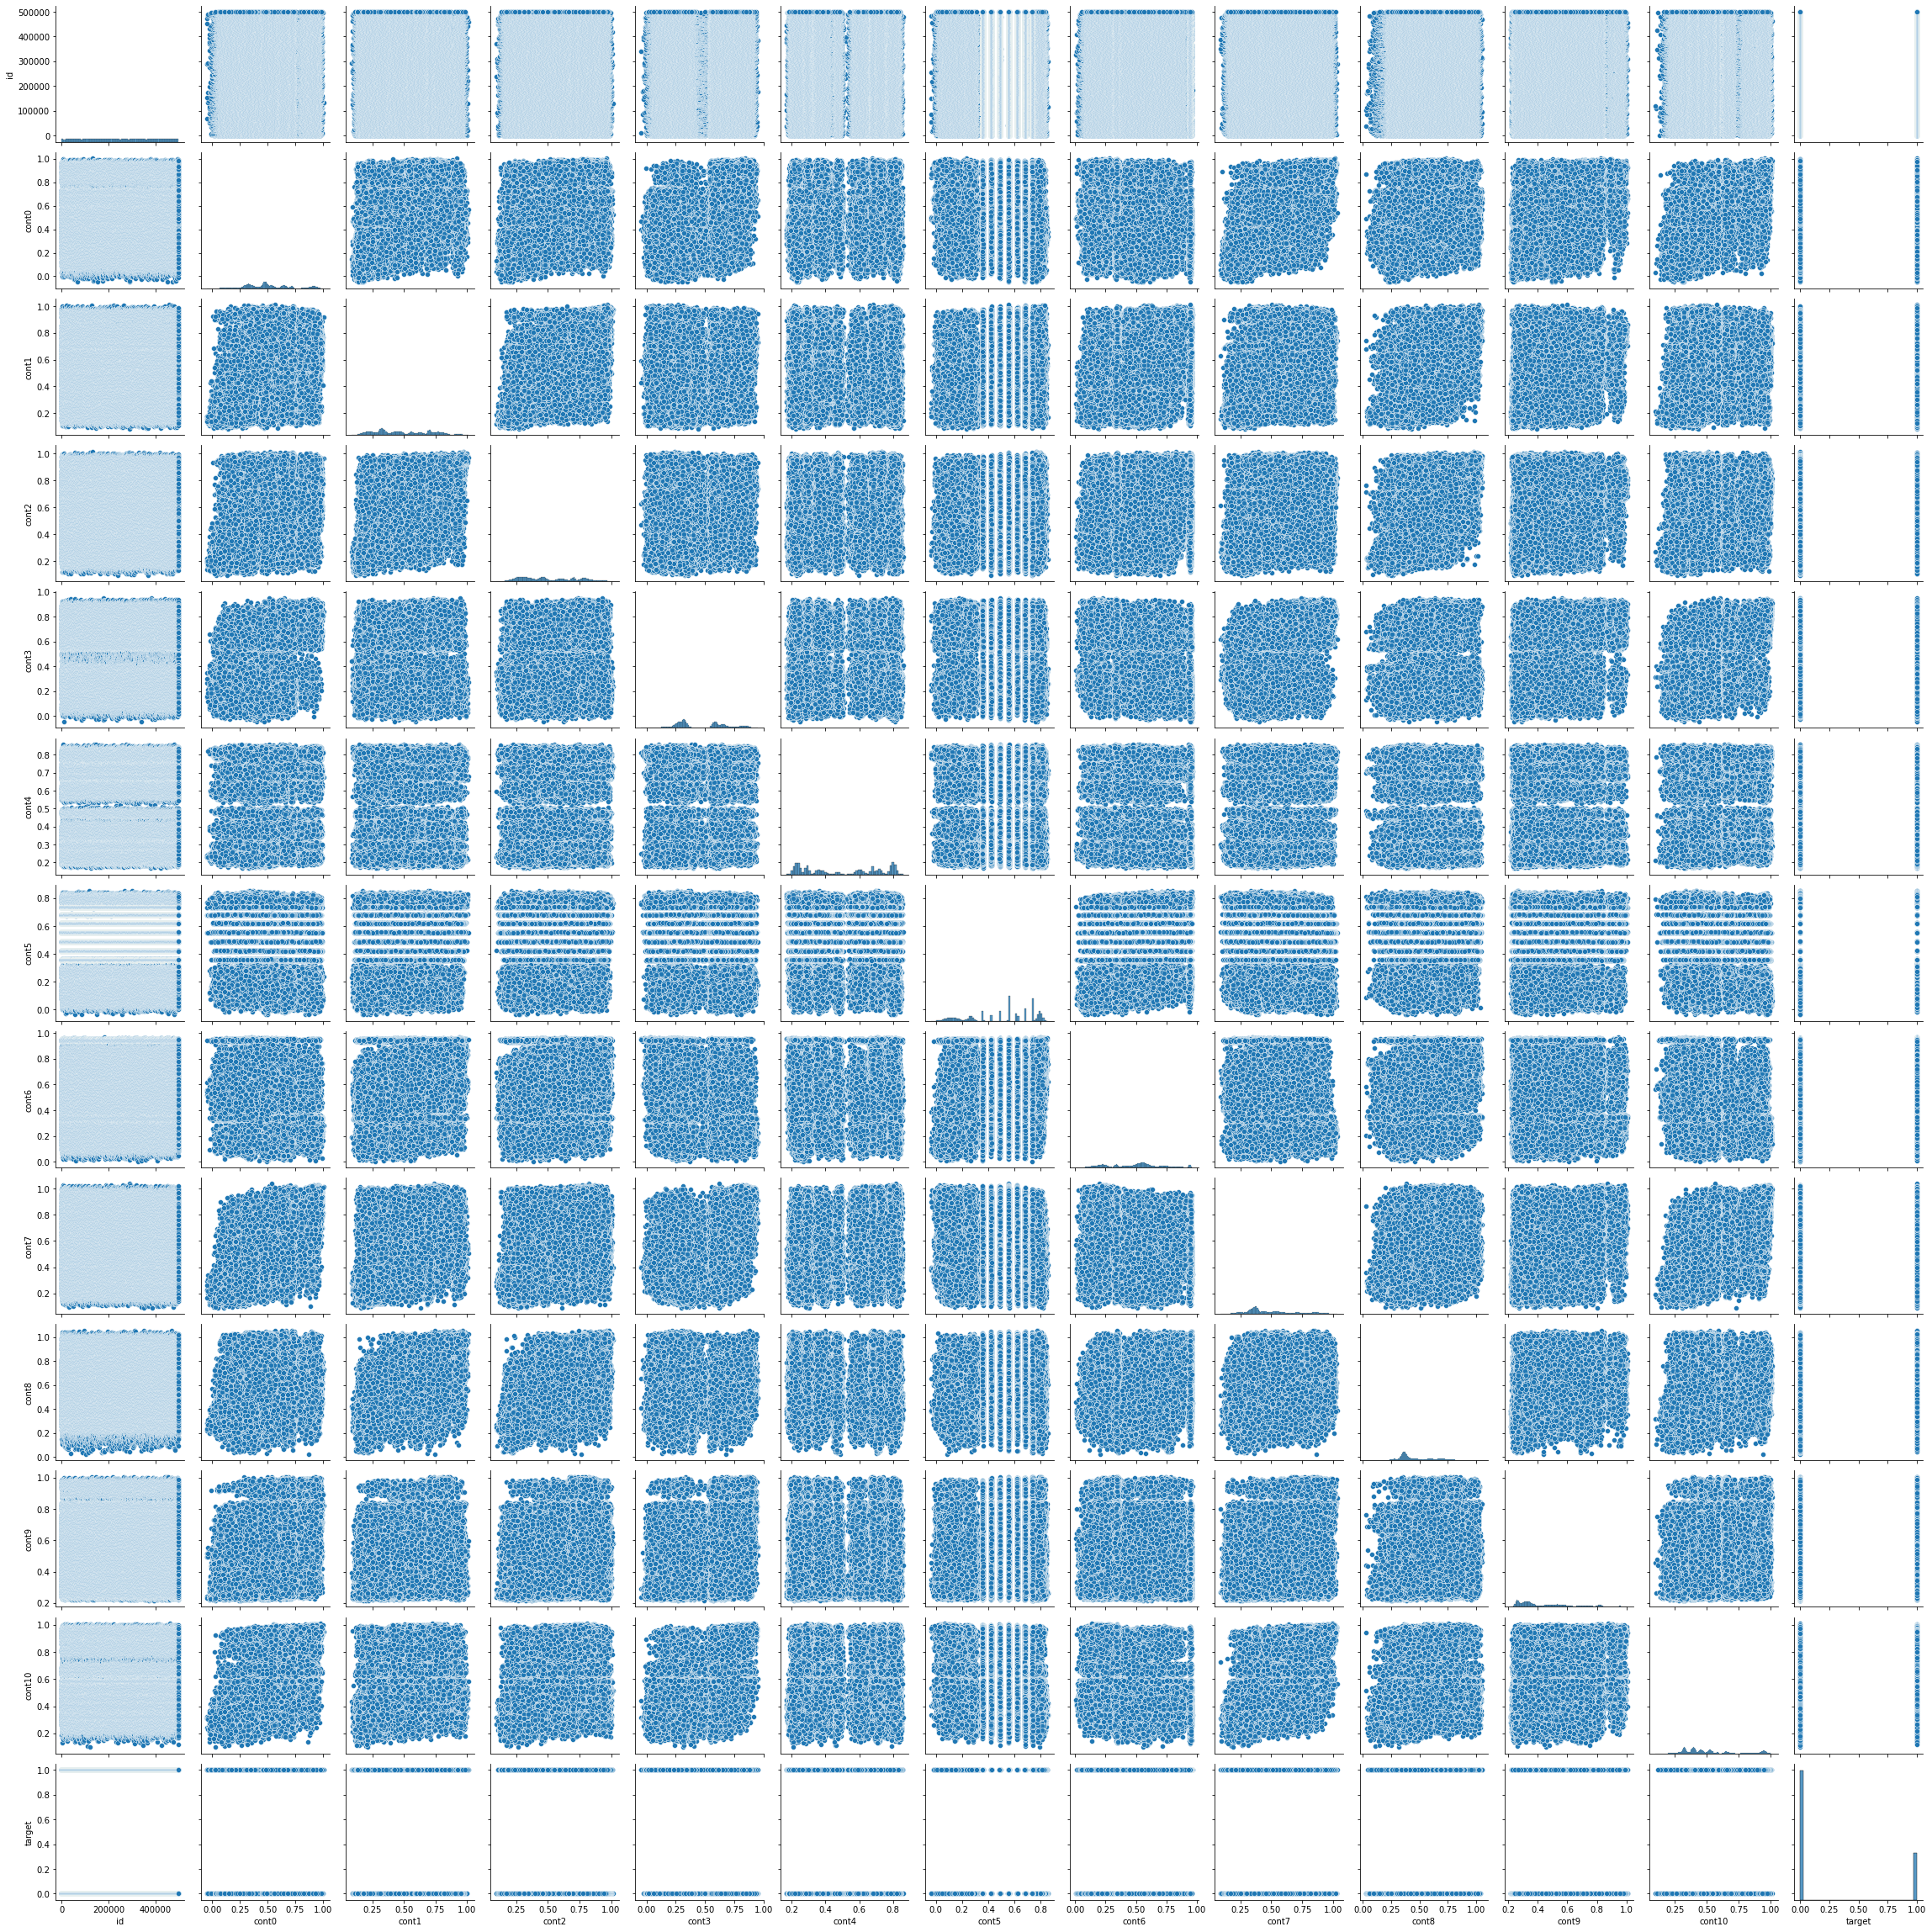

In [8]:
sns.pairplot(df_train)

<AxesSubplot:>

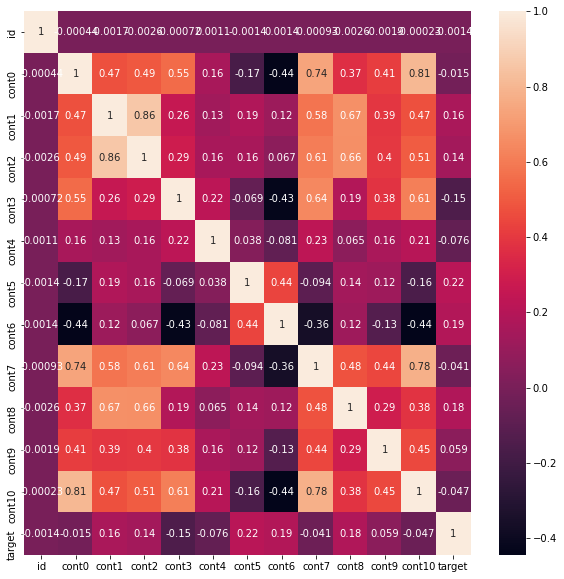

In [12]:
from matplotlib.pyplot import figure
figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)

In [18]:
enc = OneHotEncoder(handle_unknown='ignore')


In [13]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_train, df_test)
y_pred_logreg = logreg.predict(df_train)
acc_log = logreg.score(df_train, df_test)
print(acc_log)

ValueError: could not convert string to float: 'A'

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(df_train, df_test)

y_pred_random_forest = random_forest.predict(df_train)
acc_random_forest = random_forest.score(df_train, df_test)
acc_random_forest

ValueError: could not convert string to float: 'A'